# Carson Slater
### MATH 493 Research Project

This jupyter notebook is essentially copied from [this jupyter notebook](https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb). I wanted to run this on my local device to seee if I could get these packages to work and if I could better understand the mechanics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/nachi-hebbar/Time-Series-Forecasting-LSTM/main/monthly_milk_production.csv"
df = pd.read_csv(url, index_col = "Date", parse_dates = True)

df.head(5)

# Covert the index to months
df.index.freq='MS'

Now that we have the data frame, lets see what this time series data looks like.

<AxesSubplot:xlabel='Date'>

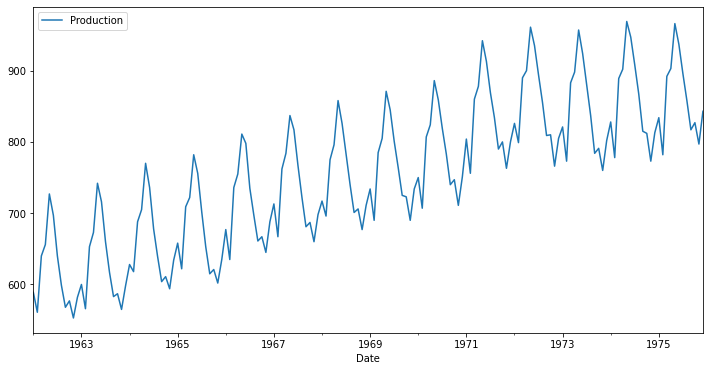

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

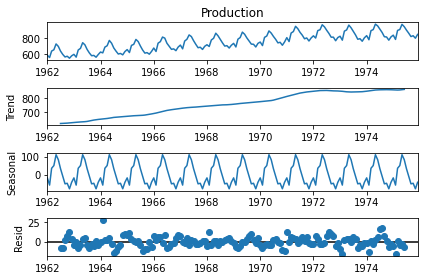

In [6]:
decomposable_components = seasonal_decompose(df['Production'])
decomposable_components.plot();

I could not figure out how to debug this function, `seasonal_decompose`

#### We need to find the number of observations in order to determine a training set and a testing set.

In [7]:
len(df)

168

#### Splitting the data

In [8]:
train = df.iloc[:156]
test = df.iloc[156:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

These data are a collection of annual measurement of milk production (not sure what units), and it is a good set to test these packages on.

Was geting an error message from `scaler.fit()` so I am troubleshooting it in the chuck below.

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)